In [ ]:
#Importing dependencies

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,precision_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV,cross_val_score,GridSearchCV
%matplotlib inline

# Importing Dataset

In [2]:
# Importing dataset

train_data =pd.read_excel("C:\MachineLearning\Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_data =pd.read_excel("C:\MachineLearning\Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
train_data.shape,test_data.shape

((10683, 11), (2671, 10))

In [5]:
#Monitor the  data-type of values 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#check for null values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
#Check for duplicate values and remove if any

print(train_data.duplicated().sum())
train_data.drop_duplicates(keep='first',inplace=True)

220

In [12]:
train_data.shape

# EDA

In [14]:
train_data['Day'] =pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
train_data['Month'] =pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month
train_data['Day'] =train_data['Day'].astype('int32')
train_data['Month'] =train_data['Month'].astype('int32')
train_data.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

In [15]:
train_data['Hour'] =pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Minute'] =pd.to_datetime(train_data['Dep_Time']).dt.minute
train_data['Hour'] =train_data['Hour'].astype('int32')
train_data['Minute'] =train_data['Minute'].astype('int32')
train_data.drop(columns=['Dep_Time'],axis=1,inplace=True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Hour,Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
train_data['Duration'].value_counts()

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
30h 25m      1
30h 15m      1
42h 5m       1
28h 55m      1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
# Handling Temporal features 

In [18]:
def format_Time(x):
    if len(x.split())!=2:
        if 'h' in x:
            x =x.strip()+' 0m'
        else:
            x ='0h '+x.strip()
    return x

In [19]:
train_data['Duration'] =train_data['Duration'].apply(format_Time)

In [20]:
train_data['duration_hrs'] =train_data['Duration'].str.split().str[0].str.split('h').str[0]
train_data['duration_mins'] =train_data['Duration'].str.split().str[1].str.split('m').str[0]
train_data['duration_hrs'] =train_data['duration_hrs'].astype('int32')
train_data['duration_mins'] =train_data['duration_mins'].astype('int32')
train_data.drop(columns=['Duration'],axis=1,inplace=True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day,Month,Hour,Minute,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,12,5,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,1,3,16,50,4,45


In [22]:
train_data['Arrival_hour'] =pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_Minutes'] =pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data['Arrival_hour'] =train_data['Arrival_hour'].astype('int32')
train_data['Arrival_Minutes'] =train_data['Arrival_Minutes'].astype('int32')
train_data.drop(columns=['Arrival_Time'],axis=1,inplace=True)

In [23]:
train_data.drop(columns=['Additional_Info','Route'],axis=1,inplace=True)

# Handling Categorical Features

In [24]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [25]:
train_data['Total_Stops'].replace({'1 stop':1,'non-stop':2,'2 stops':3,'3 stops':4,'4 stops':5},inplace=True)

In [26]:
train_data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

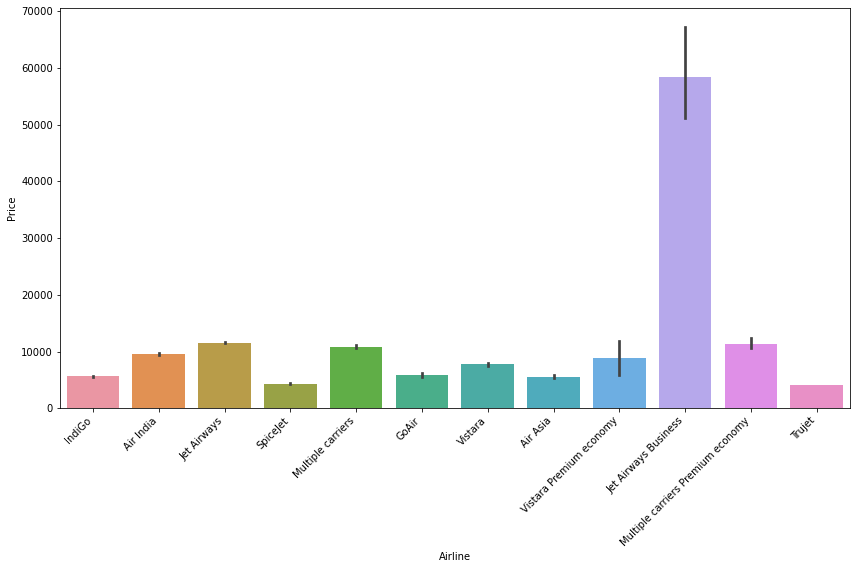

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x='Airline',y='Price',data=train_data)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

Conclusion:

1. Price Variability Across Airlines:
    - Jet Airways Business has the highest average price, significantly higher than all other airlines, indicating it offers a       premium service
2. Economy & Budget Airlines:
    - Budget airlines such as 'Indigo','GoAir','SpiceJet' & 'AirAsia' show lower average prices, making them more affordable         options for passengers
3. Mid-Range Airlines: 
    - Airlines like 'AirIndia','Multiple Carriers' & etc have mid range prices
      the pricing strategy suggests they offer a balance between cost and service quality.
    
4. Error Bars and Price Stability:
    - Error bars provide insights into the price variability for each airline.
      airlines other than 'Vistara Premium Economy','Jet Airways Business' have smaller error bars, indicating more consistent       pricing.

In [28]:
Airline =train_data[['Airline']]
Airline =pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


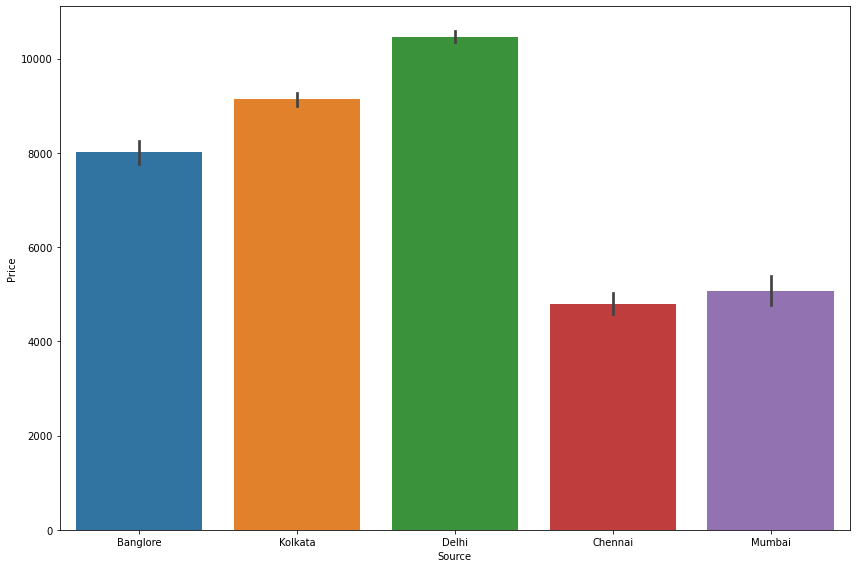

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x='Source',y='Price',data=train_data)
#plt.xticks(rotation=45,ha='right')
plt.tight_layout() 
plt.show()

In [30]:
Route =train_data['Source']+' to '+train_data['Destination']

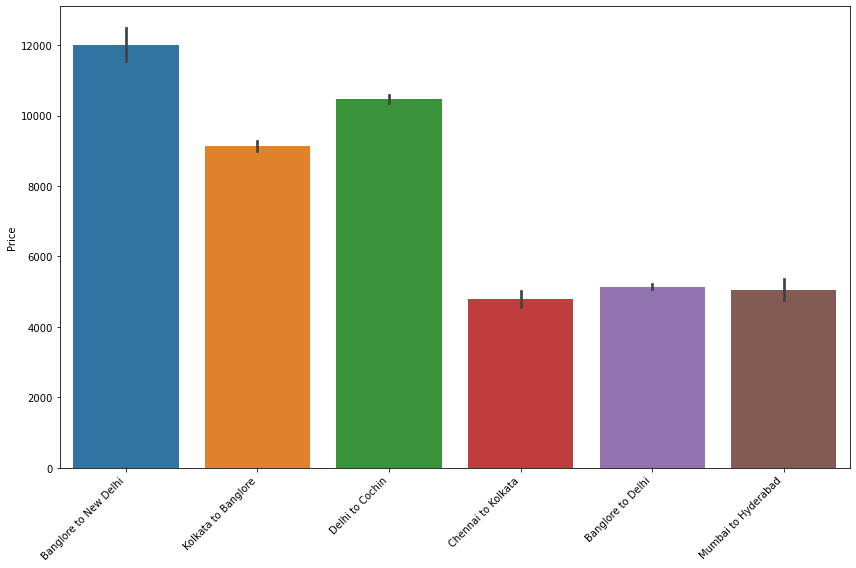

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x=Route,y='Price',data=train_data)
plt.xticks(rotation=45,ha='right')
plt.tight_layout() 
plt.show()

Conclusion:

The above plot indicates the higher price for the airlines which are having Source and Destination as 'Bangalore to New Delhi', 'Kolkata to Bangalore' and 'Delhi to Coachin'
in the above plot Airline from 'Bangalore to New Delhi' exhibit higher error bar indicating variability in the price whch can be
sometimes higher and low 

In [32]:
Source =train_data[['Source']]
Source =pd.get_dummies(Source,drop_first=True)


Destination =train_data[['Destination']]
Destination =pd.get_dummies(Destination,drop_first=True)

In [33]:
train_data =pd.concat([train_data,Airline,Source,Destination],axis=1)

In [34]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Hour,Minute,duration_hrs,duration_mins,Arrival_hour,Arrival_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,2,3897,24,3,22,20,2,50,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,3,7662,1,5,5,50,7,25,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,3,13882,9,6,9,25,19,0,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,5,25,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,4,45,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
train_data.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)

Test Data

In [36]:
test_data.dropna(inplace=True)
test_data.drop_duplicates(keep='first',inplace=True)

test_data['Day'] =pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
test_data['Month'] =pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.month
test_data['Day'] =test_data['Day'].astype('int32')
test_data['Month'] =test_data['Month'].astype('int32')
test_data.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

test_data['Hour'] =pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Minute'] =pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data['Hour'] =test_data['Hour'].astype('int32')
test_data['Minute'] =test_data['Minute'].astype('int32')
test_data.drop(columns=['Dep_Time'],axis=1,inplace=True)

def format_Time(x):
    if len(x.split())!=2:
        if 'h' in x:
            x =x.strip()+' 0m'
        else:
            x ='0h '+x.strip()
    return x

test_data['Duration'] =test_data['Duration'].apply(format_Time)



test_data['duration_hrs'] =test_data['Duration'].str.split().str[0].str.split('h').str[0]
test_data['duration_mins'] =test_data['Duration'].str.split().str[1].str.split('m').str[0]
test_data['duration_hrs'] =test_data['duration_hrs'].astype('int32')
test_data['duration_mins'] =test_data['duration_mins'].astype('int32')
test_data.drop(columns=['Duration'],axis=1,inplace=True)



test_data['Arrival_hour'] =pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_Minutes'] =pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data['Arrival_hour'] =test_data['Arrival_hour'].astype('int32')
test_data['Arrival_Minutes'] =test_data['Arrival_Minutes'].astype('int32')
test_data.drop(columns=['Arrival_Time'],axis=1,inplace=True)

test_data.drop(columns=['Additional_Info','Route'],axis=1,inplace=True)
test_data['Total_Stops'].replace({'1 stop':1,'non-stop':2,'2 stops':3,'3 stops':4,'4 stops':5},inplace=True)

Airline =test_data[['Airline']]
Airline =pd.get_dummies(Airline,drop_first=True)

Source =test_data[['Source']]
Source =pd.get_dummies(Source,drop_first=True)


Destination =test_data[['Destination']]
Destination =pd.get_dummies(Destination,drop_first=True)

test_data =pd.concat([test_data,Airline,Source,Destination],axis=1)
test_data.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)

In [37]:
test_data.head()

,Total_Stops,Day,Month,Hour,Minute,duration_hrs,duration_mins,Arrival_hour,Arrival_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,10,55,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,4,0,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,23,45,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,13,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2,24,6,23,55,2,50,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [38]:
train_data.shape,test_data.shape

((10462, 30), (2645, 28))

In [39]:
for feature in train_data.columns:
    if feature not in test_data.columns:
        print(feature)
    

Price
Airline_Trujet


# Feature selection 
#Heatmap

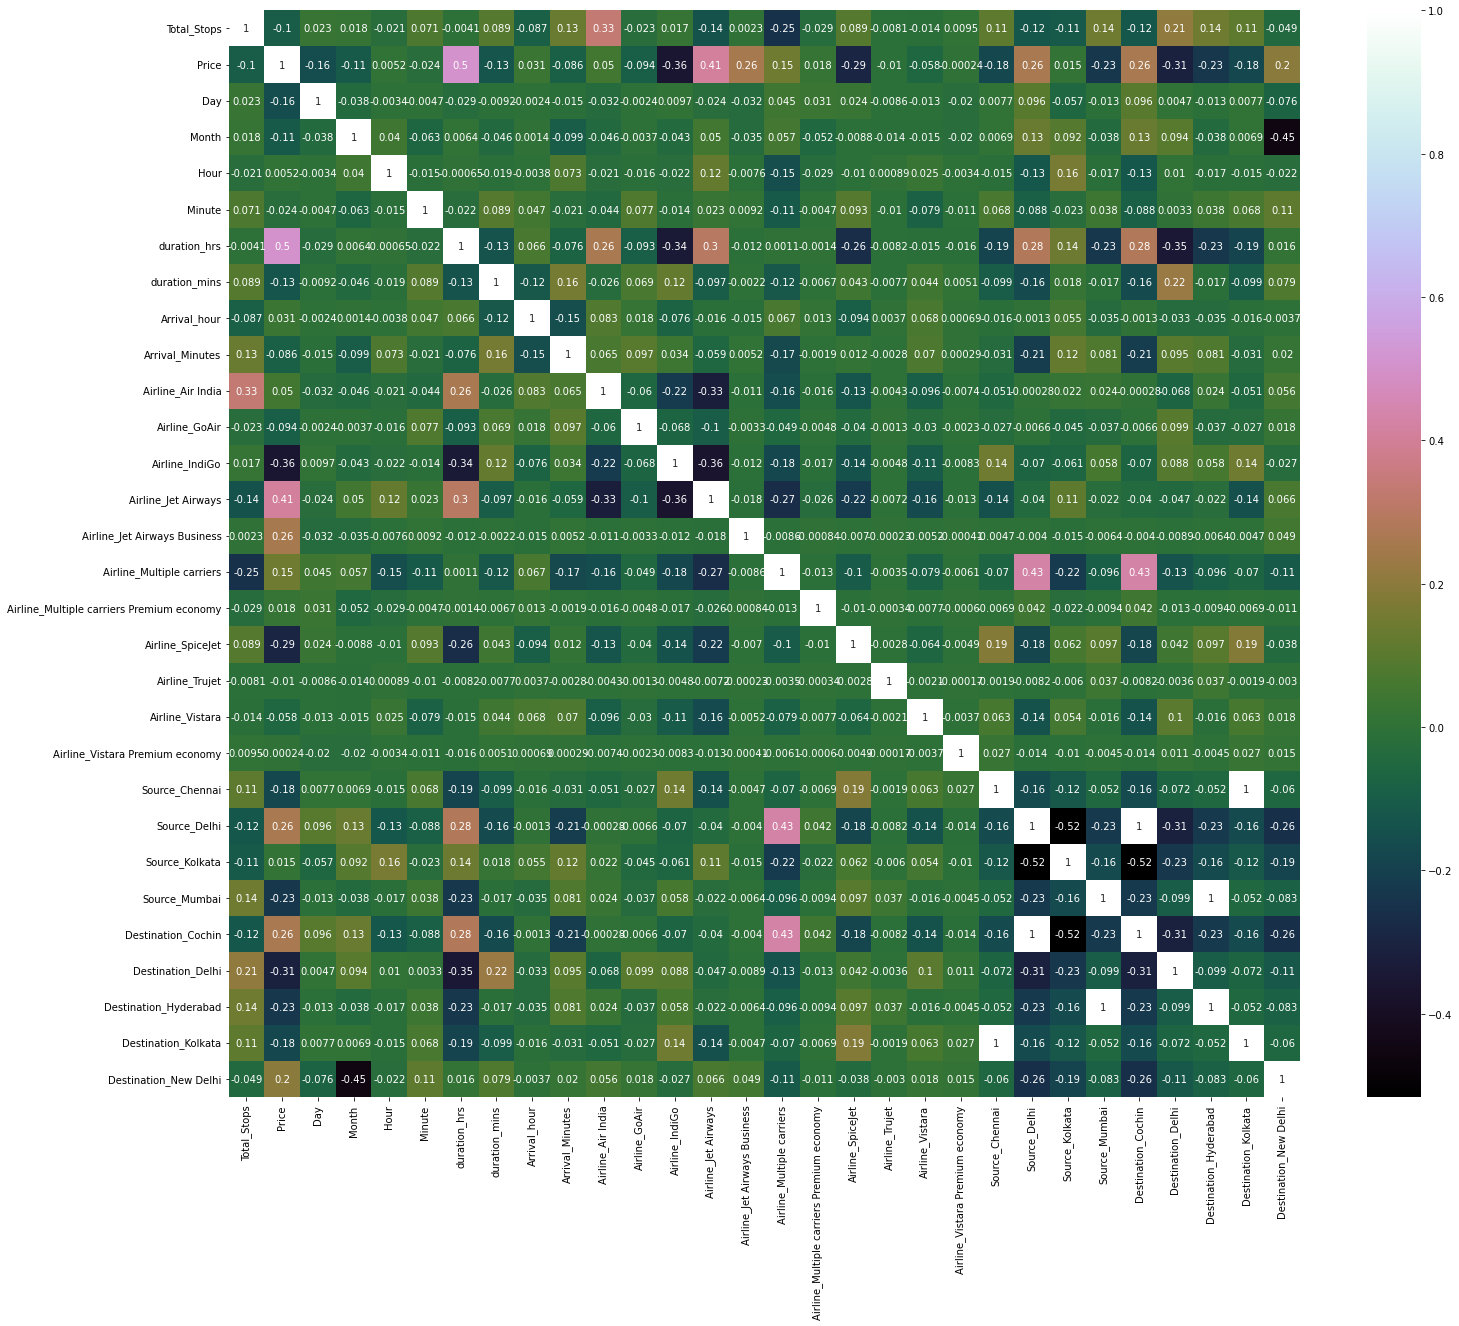

In [40]:
#Checking Correlation between variables 
plt.figure(figsize=(24,20))
sns.heatmap(train_data.corr(),annot=True,cmap=plt.cm.cubehelix)
plt.show()

Conclusion:from above table it can be seen that there is no strong relation between variables

# Fitting model using Random Forest
Split dataset into train and test set in order to prediction w.r.t X_test
If needed do scaling of data
Scaling is not done in Random forest
Import model
Fit the data
Predict w.r.t X_test
In regression check RSME Score
Plot graph

In [44]:
X =train_data.drop(columns=s=['Price'],axis=1)
y =train_data['Price']

In [45]:
X.shape,y.shape

((10462, 29), (10462,))

In [47]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
model =RandomForestRegressor()

In [49]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
y_pred =model.predict(X_test)

In [57]:
model.score(X_train, y_train)

0.9534568490213741

In [58]:
model.score(X_test,y_test)

0.8119770425062361

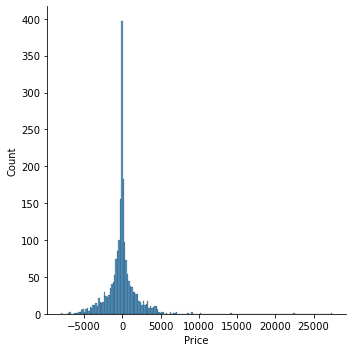

In [60]:
sns.displot(y_test-y_pred)
plt.show()

In [62]:
mean_squared_error(y_test,y_pred)

3920330.6291366117

# Saving the Model

In [118]:
joblib.dump(model,'model')

['model']

In [119]:
model =joblib.load('model')

# Hypertuning using RandomizedSearchCV & GridSearchCV

In [65]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [66]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [67]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [68]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [69]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [77]:
best_model =rf_random.best_estimator_

In [93]:
best_model.score(X_test,y_test)

0.8316915819027271

In [79]:
best_model.score(X_train,y_train)

0.8978478513889685

In [81]:
cv_score =cross_val_score(new_model,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
-np.mean(cv_score)

In [82]:
joblib.dump(best_model,'model')
model =load('model')

3903024.735561347

In [86]:
param_grid = {'n_estimators': [100,200],
               'max_features': ['sqrt','log2'],
               'max_depth': [5,10,15],
               'min_samples_split': [10,15,20],
               'min_samples_leaf': [4,6,8],
              'bootstrap':[True]}

In [87]:
grid_search =GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2,scoring='neg_mean_squared_error')

In [88]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [89]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [90]:
best_rf =grid_search.best_estimator_

In [91]:
best_rf.score(X_train,y_train)

0.8267841173471111

In [92]:
best_rf.score(X_test,y_test)

0.7835843926717132

In [95]:
n_features_list =[10,15,20,25,30]
result =[] 

In [96]:
for feature in n_features_list:
    rf_for_rfe =RandomForestRegressor(n_estimators=100,random_state=42)
    selector =RFE(rf_for_rfe,n_features_to_select=feature,step =1)
    selector =selector.fit(X_train,y_train)
    X_train_selected =selector.transform(X_train)
    X_test_selected =selector.transform(X_test)
    
    param_grid = {'n_estimators': [100,200],
               'max_features': ['sqrt','log2'],
               'max_depth': [5,10,15],
               'min_samples_split': [10,15,20],
               'min_samples_leaf': [4,6,8],
              'bootstrap':[True]}
    grid_search =GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=0,scoring='neg_mean_squared_error')
    grid_search.fit(X_train_selected,y_train)
    best_rf =grid_search.best_estimator_
    y_pred =best_rf.predict(X_test_selected)
    mse =mean_squared_error(y_test,y_pred)
    result.append((feature,mse))

In [97]:
for feature,mse in result:
    print(feature,mse)

10 4385947.201275906
15 4388898.838040395
20 4241279.979894645
25 4347583.102754477
30 4436446.047929334


In [98]:
best_n_features =sorted(result,key=lambda x:x[1])[0][0]
print(best_n_features)

20


In [99]:
selected_features_mask =selector.support_

In [100]:
selected_features =np.array(X_train.columns)[selected_features_mask]
selected_features

array(['Total_Stops', 'Day', 'Month', 'Hour', 'Minute', 'duration_hrs',
       'duration_mins', 'Arrival_hour', 'Arrival_Minutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'], dtype=object)

In [106]:
X[selected_features].head()

,Total_Stops,Day,Month,Hour,Minute,duration_hrs,duration_mins,Arrival_hour,Arrival_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2,24,3,22,20,2,50,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,1,5,5,50,7,25,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,9,6,9,25,19,0,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,5,25,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,4,45,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [107]:
selected_features_X_train,selected_features_X_test,selected_features_y_train,selected_features_y_test =train_test_split(X[selected_features],y,test_size=0.2,random_state=42)

In [111]:
rf_random.fit(selected_features_X_train,selected_features_y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [112]:
best_rf =rf_random.best_estimator_

In [113]:
best_rf.score(selected_features_X_test,selected_features_y_test)

0.8311105225559668

In [114]:
best_rf.score(selected_features_X_train,selected_features_y_train)

0.8984581271657243

In [115]:
cv_score =cross_val_score(best_rf,selected_features_X_train,selected_features_y_train,cv=5,scoring='neg_mean_squared_error')
-np.mean(cv_score)

3913928.0151355998